<a href="https://colab.research.google.com/github/zenAurelius/HRAI3/blob/main/notebooks/test_recur1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/HRAI/data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/HRAI/data


In [2]:
dft = pd.read_csv('pmu2017_os.zip')
dft

,aid_cr,rfs_date,rfs_heure,ris_nom,rfi_prix,rfi_distance,rfs_corde,rfs_condSexe,rfi_nbPartants,rfs_hippodrome,...,OS_N_SG_pis_driver_1,OS_D_MU_pis_entraineur_1,OS_D_SG_pis_entraineur_1,OS_N_MU_pis_entraineur_1,OS_N_SG_pis_entraineur_1,pff_pwin_1,tgf_pwin_1,tgf_pwin_2,pff_foch_1,pff_foch_2
0,170101R01C02,170101,1255,MEULAN,44000,2700,CORDE_GAUCHE,MALES_ET_HONGRES,11,VIN,...,8.227090,1.367565,0.987201,26.367565,8.227090,0.624559,0.550000,0.450000,1500,1500
1,170101R01C02,170101,1255,MEULAN,44000,2700,CORDE_GAUCHE,MALES_ET_HONGRES,11,VIN,...,8.227090,-1.901213,0.987201,23.098787,8.227090,0.624559,0.470588,0.529412,1500,1500
2,170101R01C02,170101,1255,MEULAN,44000,2700,CORDE_GAUCHE,MALES_ET_HONGRES,11,VIN,...,8.227090,-1.901213,0.987201,23.098787,8.227090,0.624559,0.250000,0.750000,1500,1500
3,170101R01C02,170101,1255,MEULAN,44000,2700,CORDE_GAUCHE,MALES_ET_HONGRES,11,VIN,...,8.227090,-1.901213,0.987201,23.098787,8.227090,0.624559,0.357143,0.642857,1500,1500
4,170101R01C02,170101,1255,MEULAN,44000,2700,CORDE_GAUCHE,MALES_ET_HONGRES,11,VIN,...,8.227090,-1.901213,0.987201,23.098787,8.227090,0.624559,0.400000,0.600000,1500,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410621,171231R04C07,171231,1530,ORGIE,17000,2825,CORDE_GAUCHE,TOUS_CHEVAUX,18,COR,...,1.003861,0.001128,0.999974,21.108003,0.856488,0.999798,0.521739,0.478261,1500,1500
1410622,171231R04C07,171231,1530,ORGIE,17000,2825,CORDE_GAUCHE,TOUS_CHEVAUX,18,COR,...,1.003453,-0.090292,0.999678,21.016583,0.856235,0.940525,0.153846,0.846154,1500,1500
1410623,171231R04C07,171231,1530,ORGIE,17000,2825,CORDE_GAUCHE,TOUS_CHEVAUX,18,COR,...,1.002983,-0.060518,0.999337,21.046357,0.855942,0.640753,0.352941,0.647059,1500,1500
1410624,171231R04C07,171231,1530,ORGIE,17000,2825,CORDE_GAUCHE,TOUS_CHEVAUX,18,COR,...,1.003273,-0.080788,0.999547,21.026087,0.856122,0.867923,0.388889,0.611111,1500,1500


In [3]:
#SELECTION DES FEATURES ET TARGET
#df = df[['rfi_prix','rfi_distance','pfi_chNbPlaces_1','pff_rapportDirect_1','pff_ord_1','pfi_chNbPlaces_2','pff_rapportDirect_2','pff_ord_2','tgf_win_1']].copy()
df = dft[['aid_cr','pis_cheval_1','pis_cheval_2','pff_rapportDirect_1','pff_foch_1','pff_rapportDirect_2','pff_foch_2','tgf_pwin_1']].copy()
df = df[(~df.pff_rapportDirect_2.isna()) & (~df.pff_rapportDirect_1.isna())].copy()
df.head()

,aid_cr,pis_cheval_1,pis_cheval_2,pff_rapportDirect_1,pff_foch_1,pff_rapportDirect_2,pff_foch_2,tgf_pwin_1
0,170101R01C02,DEFI DE MEMARTIN,DEEPSTACK,243.0,1500,7.5,1500,0.550000
1,170101R01C02,DEFI DE MEMARTIN,DAMOUR JIEL,243.0,1500,30.0,1500,0.470588
2,170101R01C02,DEFI DE MEMARTIN,DOUGLAS,243.0,1500,14.0,1500,0.250000
3,170101R01C02,DEFI DE MEMARTIN,DIABLE DE VAUVERT,243.0,1500,7.2,1500,0.357143
4,170101R01C02,DEFI DE MEMARTIN,DADDY CASH,243.0,1500,8.7,1500,0.400000


In [4]:
train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])
print(len(train), 'training examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')


1109326 training examples
138666 validation examples
138666 test examples


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [5]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  df = dataframe[['pff_rapportDirect_1','pff_foch_1','pff_rapportDirect_2','pff_foch_2','tgf_pwin_1']].copy()
  labels = df.pop('tgf_pwin_1')
  df = {key: np.array(value)[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [6]:
def get_normalization_layer(name, dataset):
  # Create a Normalization layer for the feature.
  normalizer = layers.Normalization(axis=None)

  # Prepare a Dataset that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

In [45]:
batch_size = 256
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)


In [26]:
all_inputs = []
encoded_features = []

# Numerical features.
#for header in ['rfi_prix', 'rfi_distance', 'pfi_chNbPlaces_1', 'pff_rapportDirect_1', 'pff_ord_1', 'pfi_chNbPlaces_2', 'pff_rapportDirect_2', 'pff_ord_2']:
for header in ['pff_rapportDirect_1', 'pff_foch_1', 'pff_rapportDirect_2', 'pff_foch_2']:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

In [9]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(32, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(all_inputs, output)


In [10]:
model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))


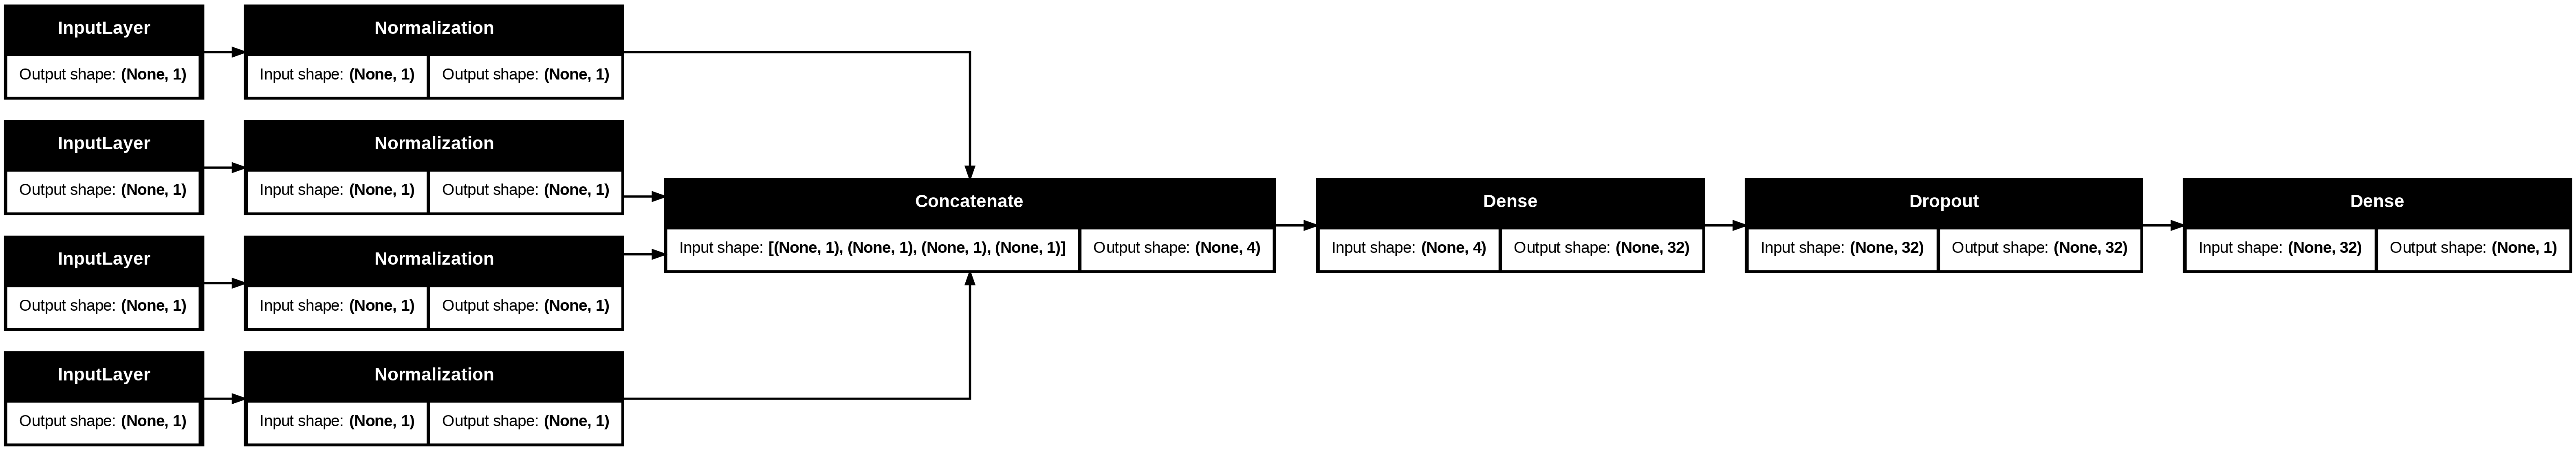

In [11]:
# Use `rankdir='LR'` to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")


In [27]:
model.fit(train_ds, epochs=2, validation_data=val_ds)


Epoch 1/2
4334/4334 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - loss: 19.4950 - val_loss: 0.1722
Epoch 2/2
4334/4334 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - loss: 0.1749 - val_loss: 0.1690


In [29]:
model.save('classifier_test.keras')
reloaded_model = tf.keras.models.load_model('classifier_test.keras')

In [46]:
predictions = reloaded_model.predict(test_ds)
predictions

542/542 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


array([[0.5411487 ],
       [0.48554975],
       [0.5492399 ],
       ...,
       [0.5081528 ],
       [0.49266246],
       [0.49522945]], dtype=float32)

In [47]:
# prompt: je veux mettre le résultat des prédictions dans une colonne 'pred' du dataframe d'origine 'test'

# Convert predictions to a binary classification (e.g., using a threshold)
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

# Add the predictions as a new column 'pred' to the test dataframe
test['pred_w'] = binary_predictions
test['win1'] = (test.tgf_pwin_1 > threshold).astype(int)
test['pred'] = predictions
test['win_cote'] = (test['pff_rapportDirect_2'] > test['pff_rapportDirect_1']).astype(int)
test['win_ord'] = (test['pff_foch_1'] > test['pff_foch_2']).astype(int)

# Print the updated dataframe with predictions
test

,aid_cr,pis_cheval_1,pis_cheval_2,pff_rapportDirect_1,pff_foch_1,pff_rapportDirect_2,pff_foch_2,tgf_pwin_1,pred_w,win1,pred,win_cote,win_ord,ELO_pis_cheval_1,D_ELO_pis_cheval,NEXT_ELO_pis_cheval
0,170101R01C02,DAMOUR JIEL,DEFI DE MEMARTIN,30.0,1500.000000,243.0,1500,0.529412,1,1,0.541149,1,0,1500.000000,-0.234739,1499.765261
1,170101R01C02,DAMOUR JIEL,DORIAN DE SOUVIGNE,30.0,1500.000000,18.0,1500,0.466667,0,0,0.485550,0,0,1500.000000,-0.377662,1499.622338
2,170101R01C02,DIABLE DE VAUVERT,DEFI DE MEMARTIN,7.2,1500.000000,243.0,1500,0.642857,1,1,0.549240,1,0,1500.000000,1.872345,1501.872345
3,170101R01C02,DAMOUR JIEL,DREAMMOKO,30.0,1500.000000,39.0,1500,0.111111,1,0,0.503147,1,0,1500.000000,-7.840725,1492.159275
4,170101R01C02,DEXTER CHATHO,DEEPSTACK,2.5,1500.000000,7.5,1500,0.846154,0,1,0.494448,1,0,1500.000000,7.034114,1507.034114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138661,171231R04C07,CHACHA DE GONTIER,CIALOTTA,2.2,1514.628836,19.0,1500,0.916667,1,1,0.525706,1,1,1514.628836,7.775756,1522.404592
138662,171231R04C07,CLEVER BLUE,COW BOY SENOVILLE,29.0,1502.357808,103.0,1500,0.500000,1,0,0.521444,1,1,1502.357808,-0.464538,1501.893270
138663,171231R04C07,CALL ON ME RANAIS,CARAMEL D'ECHAL,15.0,1500.932112,33.0,1500,0.666667,1,1,0.508153,1,1,1500.932112,3.182509,1504.114621
138664,171231R04C07,COACH D'OURVILLE,CASH DE FAEL,31.0,1504.149378,6.9,1500,0.647059,0,1,0.492662,0,1,1504.149378,3.123727,1507.273105


In [50]:
print(len(test[(test.pred_w == 1) & (test.win1 == 1)]) / len(test[(test.win1 == 1)]))
print(len(test[(test.win_cote == 1) & (test.win1 == 1)]) / len(test[(test.win1 == 1)]))
print(len(test[(test.win_ord == 1) & (test.win1 == 1)]) / len(test[(test.win1 == 1)]))

0.568917976673428
0.6293103448275862
0.4584495436105477


In [42]:
print(len(test[(test.pred_w == 0) & (test.win1 == 0)]) / len(test[(test.win1 == 0)]))
print(len(test[(test.win_cote == 0) & (test.win1 == 0)]) / len(test[(test.win1 == 0)]))
print(len(test[(test.win_ord == 0) & (test.win1 == 0)]) / len(test[(test.win1 == 0)]))

0.6372912310420582
0.6215161059791959
0.6287948969058521


In [43]:
test = calc_oskill(test, {})
test

<ipython-input-18-da622026c9ea>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  r = bycr.apply(lambda x: calc_force_bycr(x, forces, 'pis_cheval'))


,aid_cr,pis_cheval_1,pis_cheval_2,pff_rapportDirect_1,pff_foch_1,pff_rapportDirect_2,pff_foch_2,tgf_pwin_1,pred_w,win1,pred,win_cote,win_ord,ELO_pis_cheval_1,D_ELO_pis_cheval,NEXT_ELO_pis_cheval
0,170101R01C02,DAMOUR JIEL,DEFI DE MEMARTIN,30.0,1500.000000,243.0,1500,0.529412,1,1,0.541149,1,0,1500.000000,-0.234739,1499.765261
1,170101R01C02,DAMOUR JIEL,DORIAN DE SOUVIGNE,30.0,1500.000000,18.0,1500,0.466667,0,0,0.485550,0,0,1500.000000,-0.377662,1499.622338
2,170101R01C02,DIABLE DE VAUVERT,DEFI DE MEMARTIN,7.2,1500.000000,243.0,1500,0.642857,1,1,0.549240,1,0,1500.000000,1.872345,1501.872345
3,170101R01C02,DAMOUR JIEL,DREAMMOKO,30.0,1500.000000,39.0,1500,0.111111,1,0,0.503147,1,0,1500.000000,-7.840725,1492.159275
4,170101R01C02,DEXTER CHATHO,DEEPSTACK,2.5,1500.000000,7.5,1500,0.846154,0,1,0.494448,1,0,1500.000000,7.034114,1507.034114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138661,171231R04C07,CHACHA DE GONTIER,CIALOTTA,2.2,1516.253795,19.0,1500,0.916667,1,1,0.527879,1,1,1514.628836,7.775756,1522.404592
138662,171231R04C07,CLEVER BLUE,COW BOY SENOVILLE,29.0,1503.329323,103.0,1500,0.500000,1,0,0.523227,1,1,1502.357808,-0.464538,1501.893270
138663,171231R04C07,CALL ON ME RANAIS,CARAMEL D'ECHAL,15.0,1500.207018,33.0,1500,0.666667,1,1,0.507541,1,1,1500.932112,3.182509,1504.114621
138664,171231R04C07,COACH D'OURVILLE,CASH DE FAEL,31.0,1503.680334,6.9,1500,0.647059,0,1,0.490872,0,1,1504.149378,3.123727,1507.273105


In [44]:
test.pff_foch_1 = test.ELO_pis_cheval_1

In [17]:
train['pred'] = reloaded_model.predict(train_ds)

4334/4334 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step


In [18]:
def calc_oskill(df, forces={}):
  bycr = df.groupby('aid_cr')
  r = bycr.apply(lambda x: calc_force_bycr(x, forces, 'pis_cheval'))
  return r.reset_index(drop=True)

In [19]:
def calc_force_bycr(df, forces, byc):
  df[f'ELO_{byc}_1'] = df[f'{byc}_1'].astype(str).map(forces).fillna(df.pff_foch_1)
  df[f'D_ELO_{byc}'] = 20 * (df.tgf_pwin_1 - df.pred)
  df[f'NEXT_ELO_{byc}'] = df[f'ELO_{byc}_1'] + df[f'D_ELO_{byc}']
  forces.update(df.groupby([f'{byc}_1'])[f'NEXT_ELO_{byc}'].agg("mean").to_dict())
  return df.reset_index(drop=True)

In [34]:
train = calc_oskill(train, {})
train

KeyboardInterrupt: 

In [24]:
train[train.pis_cheval_1 == 'DREAMMOKO'].head(20)

,aid_cr,pis_cheval_1,pis_cheval_2,pff_rapportDirect_1,pff_foch_1,pff_rapportDirect_2,pff_foch_2,tgf_pwin_1,pred,ELO_pis_cheval_1,D_ELO_pis_cheval,NEXT_ELO_pis_cheval
3,170101R01C02,DREAMMOKO,DOUGLAS,39.0,1500.000000,14.0,1500,0.750000,0.506773,1500.000000,4.864547,1504.864547
18,170101R01C02,DREAMMOKO,DORIAN DE SOUVIGNE,39.0,1500.000000,18.0,1500,0.875000,0.485448,1500.000000,7.791046,1507.791046
29,170101R01C02,DREAMMOKO,DEEPSTACK,39.0,1500.000000,7.5,1500,0.916667,0.521537,1500.000000,7.902592,1507.902592
30,170101R01C02,DREAMMOKO,DADDY CASH,39.0,1500.000000,8.7,1500,0.857143,0.435590,1500.000000,8.431064,1508.431064
33,170101R01C02,DREAMMOKO,DZEUS D'AVIGNERE,39.0,1500.000000,76.0,1500,0.916667,0.467435,1500.000000,8.984641,1508.984641
53,170101R01C02,DREAMMOKO,DAMOUR JIEL,39.0,1500.000000,30.0,1500,0.888889,0.443375,1500.000000,8.910281,1508.910281
56,170101R01C02,DREAMMOKO,DEFI DE MEMARTIN,39.0,1500.000000,243.0,1500,0.900000,0.455705,1500.000000,8.885892,1508.885892
63,170101R01C02,DREAMMOKO,DEXTER CHATHO,39.0,1500.000000,2.5,1500,0.666667,0.464880,1500.000000,4.035726,1504.035726
78,170101R01C02,DREAMMOKO,DOOSTY,39.0,1500.000000,5.4,1500,0.800000,0.476672,1500.000000,6.466561,1506.466561
82,170101R01C02,DREAMMOKO,DIABLE DE VAUVERT,39.0,1500.000000,7.2,1500,0.833333,0.308703,1500.000000,10.492598,1510.492598


In [36]:
train.pff_foch_1 = train.ELO_pis_cheval_1